### USA Housing Prices

**About dataset and Objective:** The dataset is about USA housing prices, using which we have to predict the price of a house.<br/>

**Attributes:**  The dataset has the following attributes:
1. Avg. Area Income<br/>
2. Avg. Area House Age<br/>
3. Avg. Area Number of Rooms<br/>
4. Avg. Area Number of Bedrooms<br/>
5. Area Population<br/>
6. Price<br/>
7. Address<br/>

**Importing packages**

In [11]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
warnings.filterwarnings('ignore')

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactiveity='all'

In [16]:
data = pd.read_csv("C:/Users/Aravind/Desktop/ML Assignment/LinR/Assignment/USA Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [17]:
data.shape

(5000, 7)

No.of Rows:5000, No.of Columns: 7
    

In [18]:
import pandas_profiling
eda = pandas_profiling.ProfileReport(data)
eda

In [21]:
usa_df = pd.DataFrame(data)          
#Null Value in data
usa_df.isnull().sum()

Avg._Area_Income                0
Avg._Area_House_Age             0
Avg._Area_Number_of_Rooms       0
Avg._Area_Number_of_Bedrooms    0
Area_Population                 0
Price                           0
Address                         0
dtype: int64

### Question: Perform Descriptive Statistics on the dataset

In [22]:
usa_df.describe().round(2)

,Avg._Area_Income,Avg._Area_House_Age,Avg._Area_Number_of_Rooms,Avg._Area_Number_of_Bedrooms,Area_Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


### Question: Remove missing values from the data frame if any

In [23]:
# There are no missing values as seen from the previous lines.

###  Question: Perform EDA and find any correlation

In [24]:
corrn = data.corr()
corrn.round(2)

,Avg._Area_Income,Avg._Area_House_Age,Avg._Area_Number_of_Rooms,Avg._Area_Number_of_Bedrooms,Area_Population,Price
Avg._Area_Income,1.00,-0.00,-0.01,0.02,-0.02,0.64
Avg._Area_House_Age,-0.00,1.00,-0.01,0.01,-0.02,0.45
Avg._Area_Number_of_Rooms,-0.01,-0.01,1.00,0.46,0.00,0.34
Avg._Area_Number_of_Bedrooms,0.02,0.01,0.46,1.00,-0.02,0.17
Area_Population,-0.02,-0.02,0.00,-0.02,1.00,0.41
Price,0.64,0.45,0.34,0.17,0.41,1.00


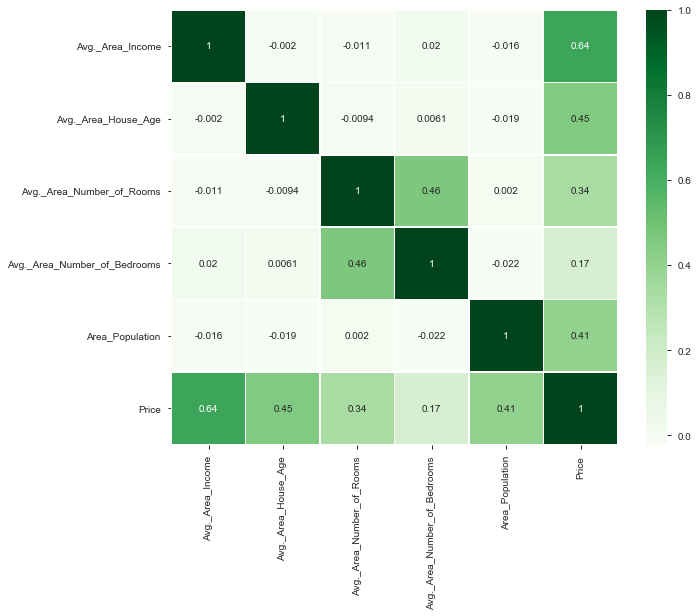

In [25]:
plt.subplots(figsize=(10,8))
sns.heatmap(corrn, cmap = 'Greens', annot = True, linewidths=.5)
plt.show()

In [24]:
# A strong correlation can be gathered from the above data between Price of the house and Avg. Area Income - about 0.64.
# Next strong correlatrion is between Price of the House and Avg. Area Income - about 0.45. 
# Next in line is Price vs Area Population - about 0.41.

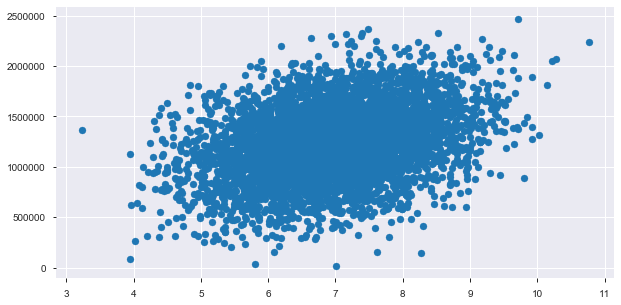

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(data['Avg._Area_Number_of_Rooms'],data['Price'])
plt.show()

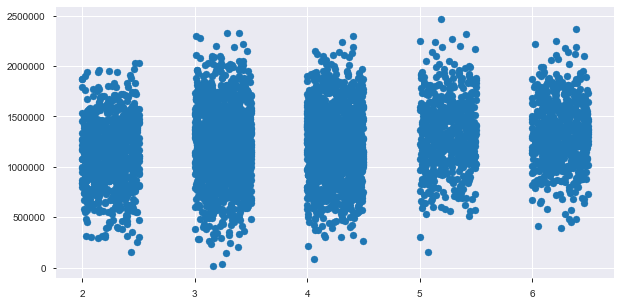

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(data['Avg._Area_Number_of_Bedrooms'],data['Price'])
plt.show()

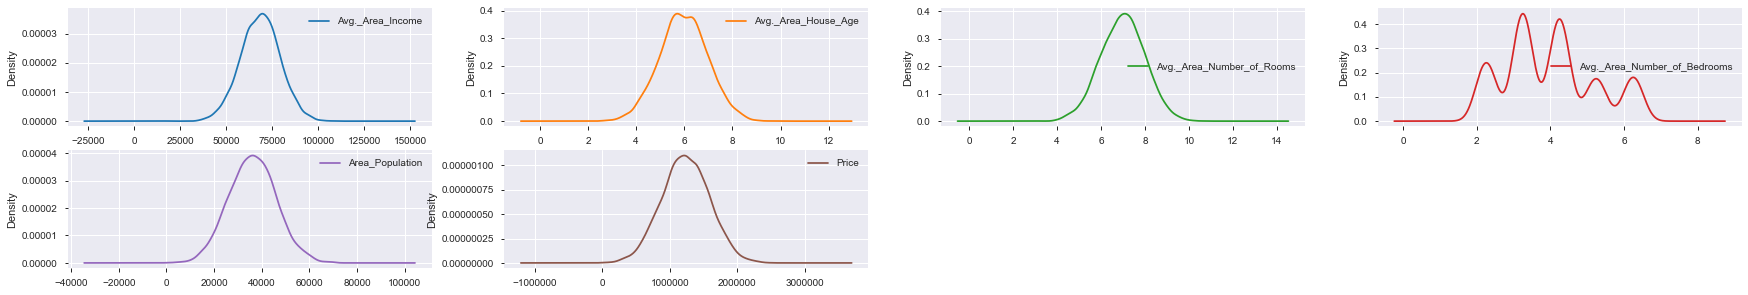

In [29]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize = (30,10))
plt.show()

In [30]:
feature=data.drop(['Price','Address'],axis=1).values
target=data['Price'].values

### Question: Perform Regression using Linear Regression and analyse the metrics

In [31]:
x = usa_df.drop(['Price', 'Address',], axis = 1)
y = usa_df['Price']
x.head()
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [32]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.30, random_state = 1)

train_x.shape
test_x.shape
train_y.shape
test_y.shape

(1500,)

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
predict_test = lm.predict(test_x)
predict_test.shape

(1500,)

In [36]:
print (lm.coef_)
df_m = pd.DataFrame({'features':x.columns, 'coeff':lm.coef_})
df_m = df_m.sort_values(by=['coeff']).round(2)
df_m

[2.16398550e+01 1.65729214e+05 1.20958349e+05 1.94909254e+03
 1.52262240e+01]


,features,coeff
4,Area_Population,15.23
0,Avg._Area_Income,21.64
3,Avg._Area_Number_of_Bedrooms,1949.09
2,Avg._Area_Number_of_Rooms,120958.35
1,Avg._Area_House_Age,165729.21


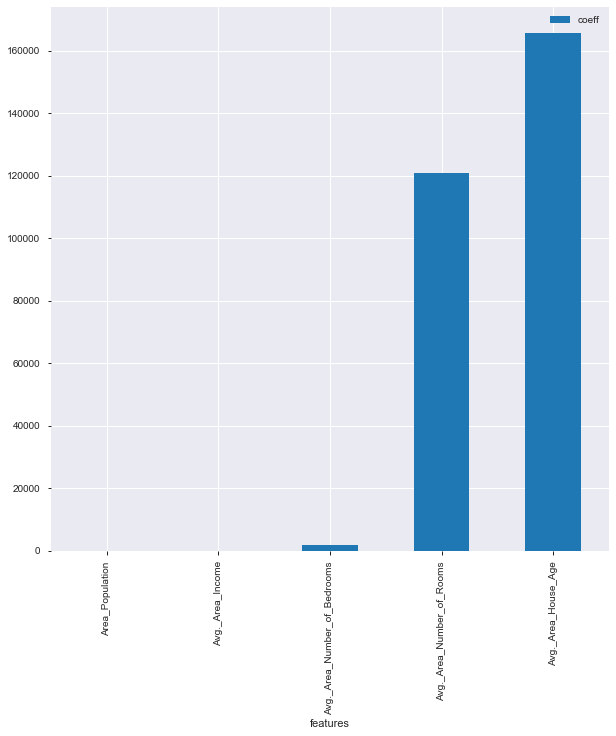

In [37]:
df_m.plot(x = 'features', y = 'coeff', kind = 'bar', figsize = (10,10))
plt.show()

In [39]:
print('R-Square Value for TEST data is-')
np.round(lm.score(test_x,test_y)*100,0)

R-Square Value for TEST data is-


92.0

In [40]:
print('R-Square Value for TRAIN data is-')
np.round(lm.score(train_x,train_y)*100,0)

R-Square Value for TRAIN data is-


92.0

In [41]:
print('Mean Squared Error (MSE) for TEST Data is')
np.round(metrics.mean_squared_error(test_y, predict_test), 0)

Mean Squared Error (MSE) for TEST Data is


10567448571.0

In [42]:
print('Mean Absolute Error (MAE) for TEST Data is')
np.round(metrics.mean_absolute_error(test_y, predict_test), 0)

Mean Absolute Error (MAE) for TEST Data is


82746.0

In [43]:
fdf = pd.concat([test_x, test_y],1)
fdf['Predicted'] = np.round(predict_test,1)
fdf['Prediction_Error']  = fdf['Price'] - fdf['Predicted']
fdf.round(2)

,Avg._Area_Income,Avg._Area_House_Age,Avg._Area_Number_of_Rooms,Avg._Area_Number_of_Bedrooms,Area_Population,Price,Predicted,Prediction_Error
2764,75012.34,6.74,6.60,4.10,42877.42,1413579.82,1555151.9,-141572.08
4767,76187.27,6.16,7.17,3.32,45084.39,1618721.14,1583399.1,35322.04
3814,67622.22,5.81,5.07,4.16,35359.85,841392.49,941481.4,-100088.91
3499,66933.17,4.75,5.88,2.09,41834.04,881443.92,942406.2,-60962.28
2735,65192.11,6.28,8.02,4.47,26228.39,1174747.55,1183395.5,-8647.95
3922,53562.40,6.32,4.03,3.13,17964.47,266298.88,328596.5,-62297.62
2701,84226.17,7.98,7.93,5.01,30167.23,1877941.97,1928870.0,-50928.03
1179,69289.18,4.93,6.36,4.44,40695.80,1022408.90,1069601.6,-47192.70
932,70961.58,8.60,6.19,2.02,38251.81,1766248.40,1649921.9,116326.50
792,64290.21,3.65,7.37,3.44,54157.30,949072.25,1073157.4,-124085.15


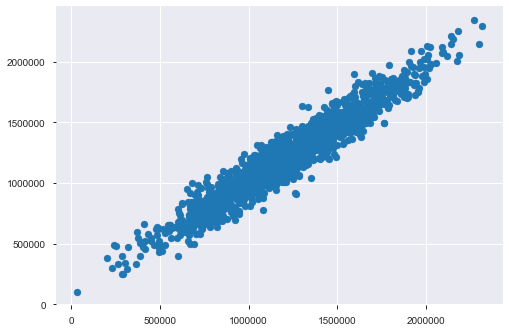

In [44]:
plt.scatter(test_y ,predict_test)
plt.show()

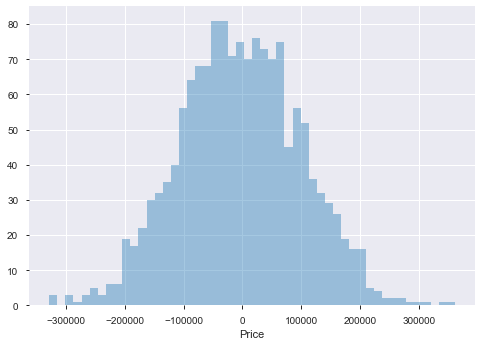

In [51]:
sns.distplot((test_y-predict_test),bins=50,  kde=False);
plt.show()

In [52]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(test_y, predict_test))
print('MSE:', metrics.mean_squared_error(test_y, predict_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predict_test)))

MAE: 82745.90894155948
MSE: 10567448570.93095
RMSE: 102798.09614448583
